In [112]:
from pydataset import data
import pandas as pd
import numpy as np

from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer

import warnings
warnings.filterwarnings('ignore')

import acquire
import prepare

import seaborn as sns

### Section 1 - iris_db: Using iris data from our mySQL server and the methods used in the lesson above:

1. Acquire, prepare & split your data.

In [113]:
iris_df = acquire.get_iris()

In [114]:
iris_df = prepare.prep_iris(iris_df)

In [115]:
iris_df.head(3)

,sepal_length,sepal_width,petal_length,petal_width,species,versicolor,virginica
0,5.1,3.5,1.4,0.2,setosa,0,0
1,4.9,3.0,1.4,0.2,setosa,0,0
2,4.7,3.2,1.3,0.2,setosa,0,0


In [116]:
train, validate, test = prepare.split_data(iris_df, 'species')

Train: 0.56
Validate: 0.24
Test: 0.2


### 2. Univariate Stats

* For each measurement type (quantitative variable): create a histogram, boxplot, & compute descriptive statistics (using .describe()).

In [117]:
# separating our numeric and categorical columns:
# initialize two empty lists for each type:
cat_cols, num_cols = [], []
# set up a for loop to build those lists out:
# so for every column in explore_columns:
for col in train:
    # check to see if its an object type,
    # if so toss it in categorical
    if train[col].dtype == 'O':
        cat_cols.append(col)
    # otherwise if its numeric:
    else:
        # check to see if we have more than just a few values:
        # if thats the case, toss it in categorical
        if train[col].nunique() < 10:
            cat_cols.append(col)
        # and otherwise call it continuous by elimination
        else:
            num_cols.append(col)

In [118]:
print(num_cols)

['sepal_length', 'sepal_width', 'petal_length', 'petal_width']


In [119]:
import seaborn as sns
import matplotlib.pyplot as plt

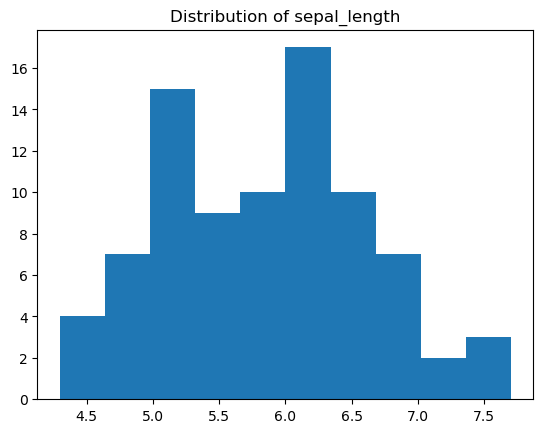

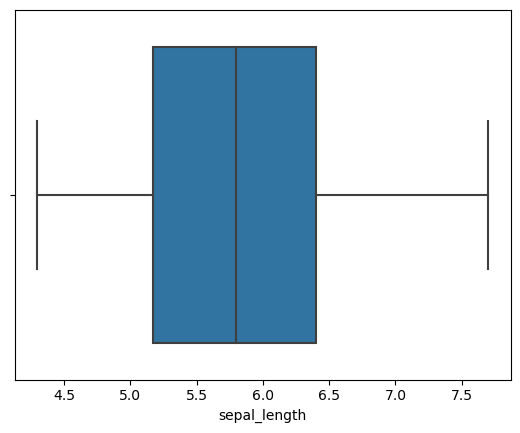

~~~~~~~~~~~~


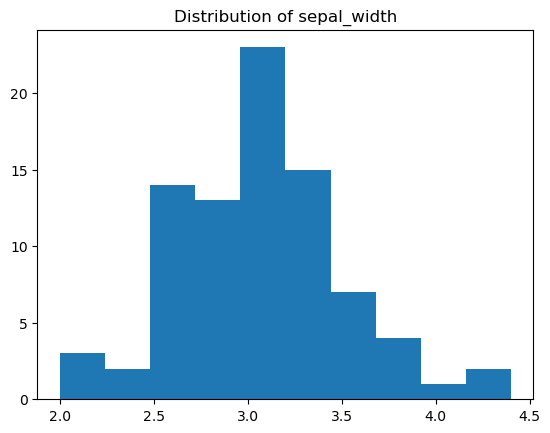

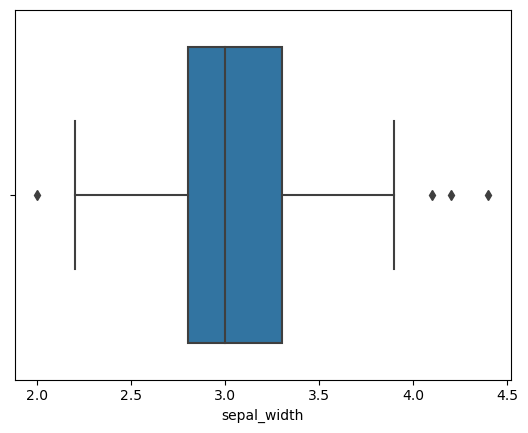

~~~~~~~~~~~~


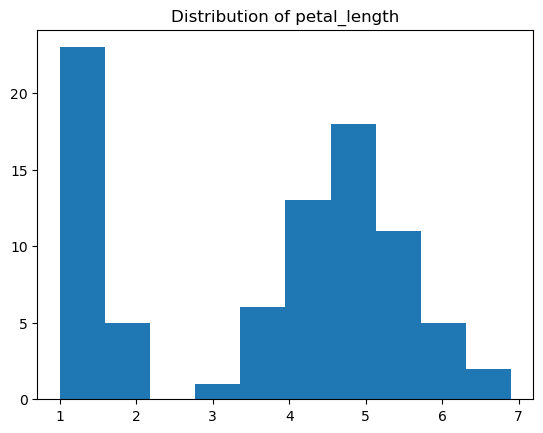

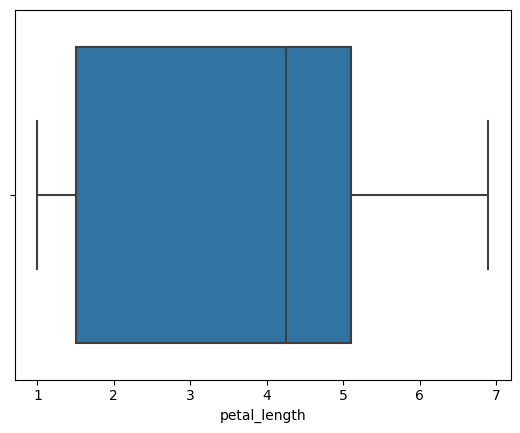

~~~~~~~~~~~~


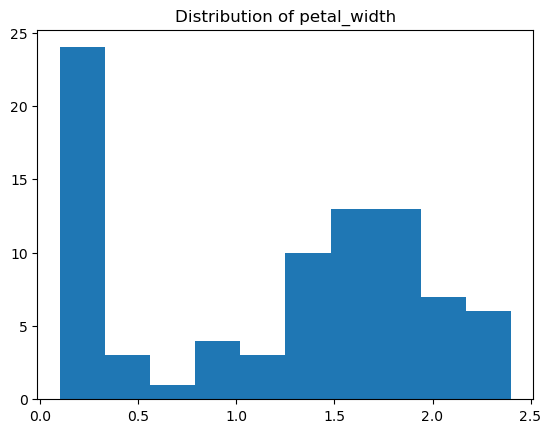

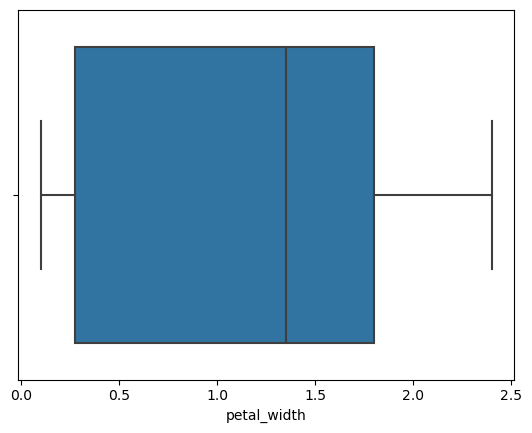

~~~~~~~~~~~~


In [120]:
for col in num_cols:
    plt.hist(train[col])
    plt.title(f'Distribution of {col}')
    plt.show()
    sns.boxplot(data=train, x=col)
    plt.show()
    print('~~~~~~~~~~~~')

In [121]:
train.describe().T.drop(['versicolor', 'virginica'])

,count,mean,std,min,25%,50%,75%,max
sepal_length,84.0,5.830952,0.774748,4.3,5.175,5.80,6.4,7.7
sepal_width,84.0,3.047619,0.441922,2.0,2.800,3.00,3.3,4.4
petal_length,84.0,3.717857,1.746195,1.0,1.500,4.25,5.1,6.9
petal_width,84.0,1.182143,0.738961,0.1,0.275,1.35,1.8,2.4


 * For each species (categorical variable): create a frequency table and a bar plot of those frequencies.

In [122]:
print(cat_cols)

['species', 'versicolor', 'virginica']


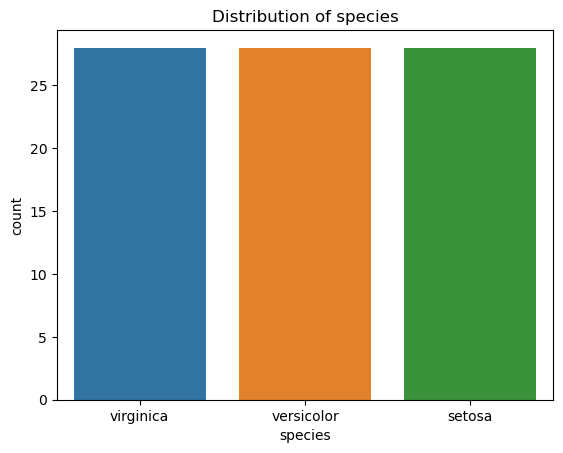

~~~~~~~~~~~~


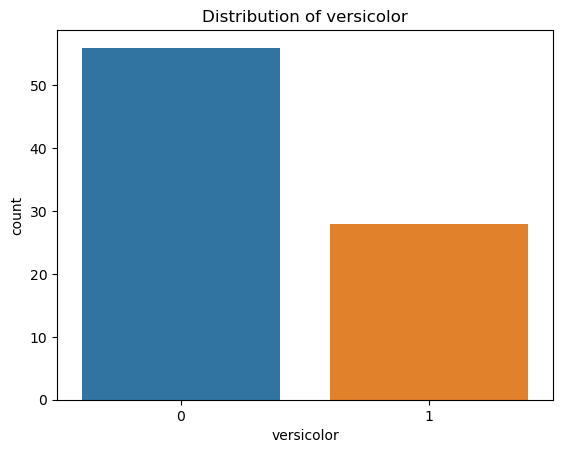

~~~~~~~~~~~~


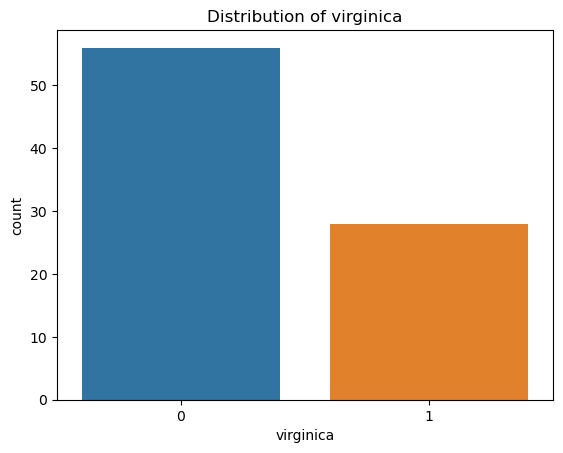

~~~~~~~~~~~~


In [123]:
for col in cat_cols:
    sns.countplot(data=train, x=col)
    plt.title(f'Distribution of {col}')
    plt.show()
    
    print('~~~~~~~~~~~~')

* Document takeaways & any actions.

        Quantitative Observations

        - sepal width and sepal length seem to have a normal distributive 
        properties and a relation with one another

        - pedal width and pedal length seem to have a close relationship 
        in how they are distributed

        Qualitative Observations

        - It appears that the samples were taken evenly across the 3      species (setosa, versicolor, virginica)

### 3. Bivariate Stats

* Visualize each measurement type (y-axis) with the species variable (x-axis) using barplots, adding a horizontal line showing the overall mean of the metric (y-axis).

In [124]:
train.columns

Index(['sepal_length', 'sepal_width', 'petal_length', 'petal_width', 'species',
       'versicolor', 'virginica'],
      dtype='object')

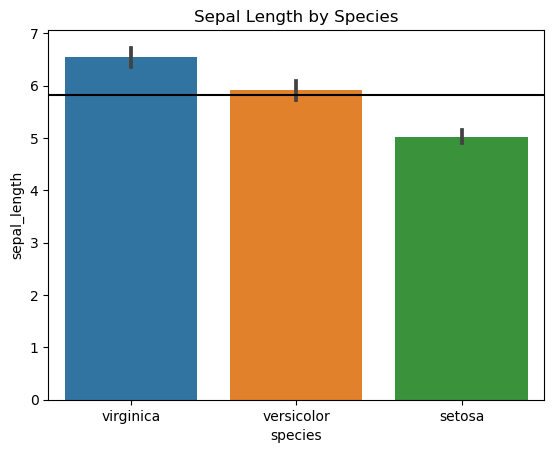

In [125]:
# sepal length
sns.barplot(
    data=train,
    x='species',
    y='sepal_length')
plt.axhline(train.sepal_length.mean(), color='black')
plt.title('Sepal Length by Species')
plt.show()

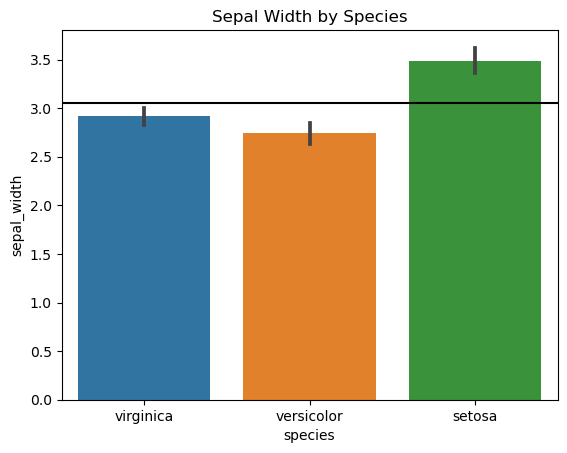

In [126]:
# sepal width
sns.barplot(
    data=train,
    x='species',
    y='sepal_width')
plt.axhline(train.sepal_width.mean(), color='black')
plt.title('Sepal Width by Species')
plt.show()

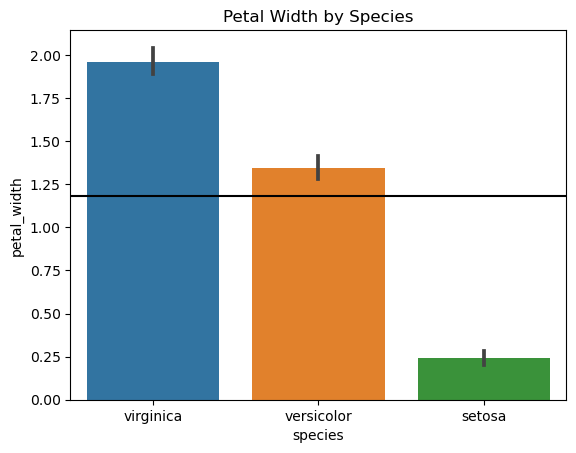

In [127]:
# pedal width
sns.barplot(
    data=train,
    x='species',
    y='petal_width')
plt.axhline(train.petal_width.mean(), color='black')
plt.title('Petal Width by Species')
plt.show()

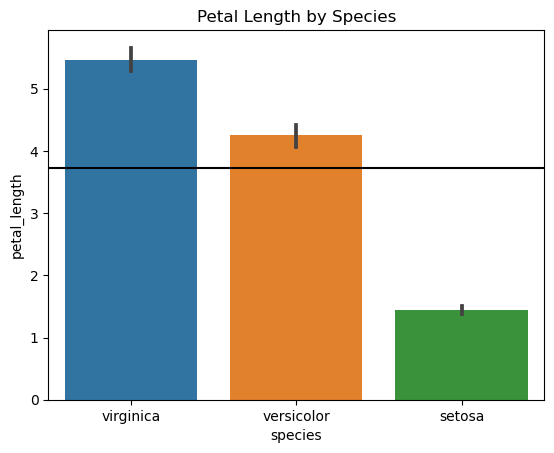

In [128]:
# pedal length
sns.barplot(
    data=train,
    x='species',
    y='petal_length')
plt.axhline(train.petal_length.mean(), color='black')
plt.title('Petal Length by Species')
plt.show()

* For each measurement type, compute the descriptive statistics for each species.

In [129]:
species_desc = train.groupby('species').describe().drop(columns=['versicolor', 'virginica']).T
species_desc

species                setosa  versicolor  virginica
sepal_length count  28.000000   28.000000  28.000000
             mean    5.025000    5.921429   6.546429
             std     0.343862    0.495429   0.518175
             min     4.300000    5.000000   5.700000
             25%     4.800000    5.600000   6.275000
             50%     5.000000    5.950000   6.450000
             75%     5.200000    6.225000   6.725000
             max     5.700000    6.900000   7.700000
sepal_width  count  28.000000   28.000000  28.000000
             mean    3.485714    2.742857   2.914286
             std     0.361800    0.312017   0.241468
             min     3.000000    2.000000   2.500000
             25%     3.200000    2.575000   2.775000
             50%     3.450000    2.800000   3.000000
             75%     3.625000    3.000000   3.025000
             max     4.400000    3.300000   3.400000
petal_length count  28.000000   28.000000  28.000000
             mean    1.439286    4.250000   5.464286
             std     0.179174    0.478036   0.521546
             min     1.000000    3.300000   4.800000
             25%     1.400000    3.975000   5.100000
             50%     1.400000    4.250000   5.400000
             75%     1.500000    4.600000   5.725000
             max     1.900000    5.100000   6.900000
petal_width  count  28.000000   28.000000  28.000000
             mean    0.239286    1.346429   1.960714
             std     0.113331    0.197169   0.219999
             min     0.100000    1.000000   1.500000
             25%     0.200000    1.275000   1.800000
             50%     0.200000    1.350000   1.900000
             75%     0.225000    1.500000   2.100000
             max     0.600000    1.700000   2.400000

* For virginica & versicolor: Compare the mean petal_width using the Mann-Whitney test (scipy.stats.mannwhitneyu) to see if there is a significant difference between the two groups. Do the same for the other measurement types.

In [130]:
from scipy import stats

# petal width of the ver and vir
vir_pw_data = train[train.species == 'virginica']['petal_width']
ver_pw_data = train[train.species == 'versicolor']['petal_width']

In [131]:
# H0: there is no diff between petal width of the versicolor and the virginica mean
# HA: there is significant diff between petal width of the versicolor and the virginica means

stat, p = stats.mannwhitneyu(vir_pw_data,ver_pw_data, method='exact')
stat, p

(775.0, 2.5363818479036434e-14)

In [132]:
if p < 0.05:
    print('we can reject the null hypothesis')
else:
    print('we fail to reject the null hypothesis')

we can reject the null hypothesis


In [133]:
# petal length of the ver and vir
vir_pl_data = train[train.species == 'virginica']['petal_length']
ver_pl_data = train[train.species == 'versicolor']['petal_length']

In [134]:
# H0: there is no diff between petal width of the versicolor and the virginica mean
# HA: there is significant diff between petal width of the versicolor and the virginica means

stat, p = stats.mannwhitneyu(vir_pl_data,ver_pl_data, method='exact')
stat, p

(765.0, 5.457143212963818e-13)

In [135]:
if p < 0.05:
    print('we can reject the null hypothesis')
else:
    print('we fail to reject the null hypothesis')

we can reject the null hypothesis


In [136]:
# sepal length of the ver and vir
vir_sl_data = train[train.species == 'virginica']['sepal_length']
ver_sl_data = train[train.species == 'versicolor']['sepal_length']

In [137]:
# H0: there is no diff between petal width of the versicolor and the virginica mean
# HA: there is significant diff between petal width of the versicolor and the virginica means

stat, p = stats.mannwhitneyu(vir_sl_data,ver_sl_data, method='exact')
stat, p

(634.0, 3.7897231564469524e-05)

In [138]:
if p < 0.05:
    print('we can reject the null hypothesis')
else:
    print('we fail to reject the null hypothesis')

we can reject the null hypothesis


In [139]:
# sepal width of the ver and vir
vir_sw_data = train[train.species == 'virginica']['sepal_width']
ver_sw_data = train[train.species == 'versicolor']['sepal_width']

In [140]:
stat, p = stats.mannwhitneyu(vir_sw_data,ver_sw_data, method='exact')
stat, p

(511.5, 0.05164938122068261)

In [141]:
if p < 0.05:
    print('we can reject the null hypothesis')
else:
    print('we fail to reject the null hypothesis')

we fail to reject the null hypothesis


* Document takeaways & any actions.

### 4. Multivariate Stats

* Visualize the interaction of each measurement type with the others using a pairplot (or scatter matrix or something similar) and add color to represent species.

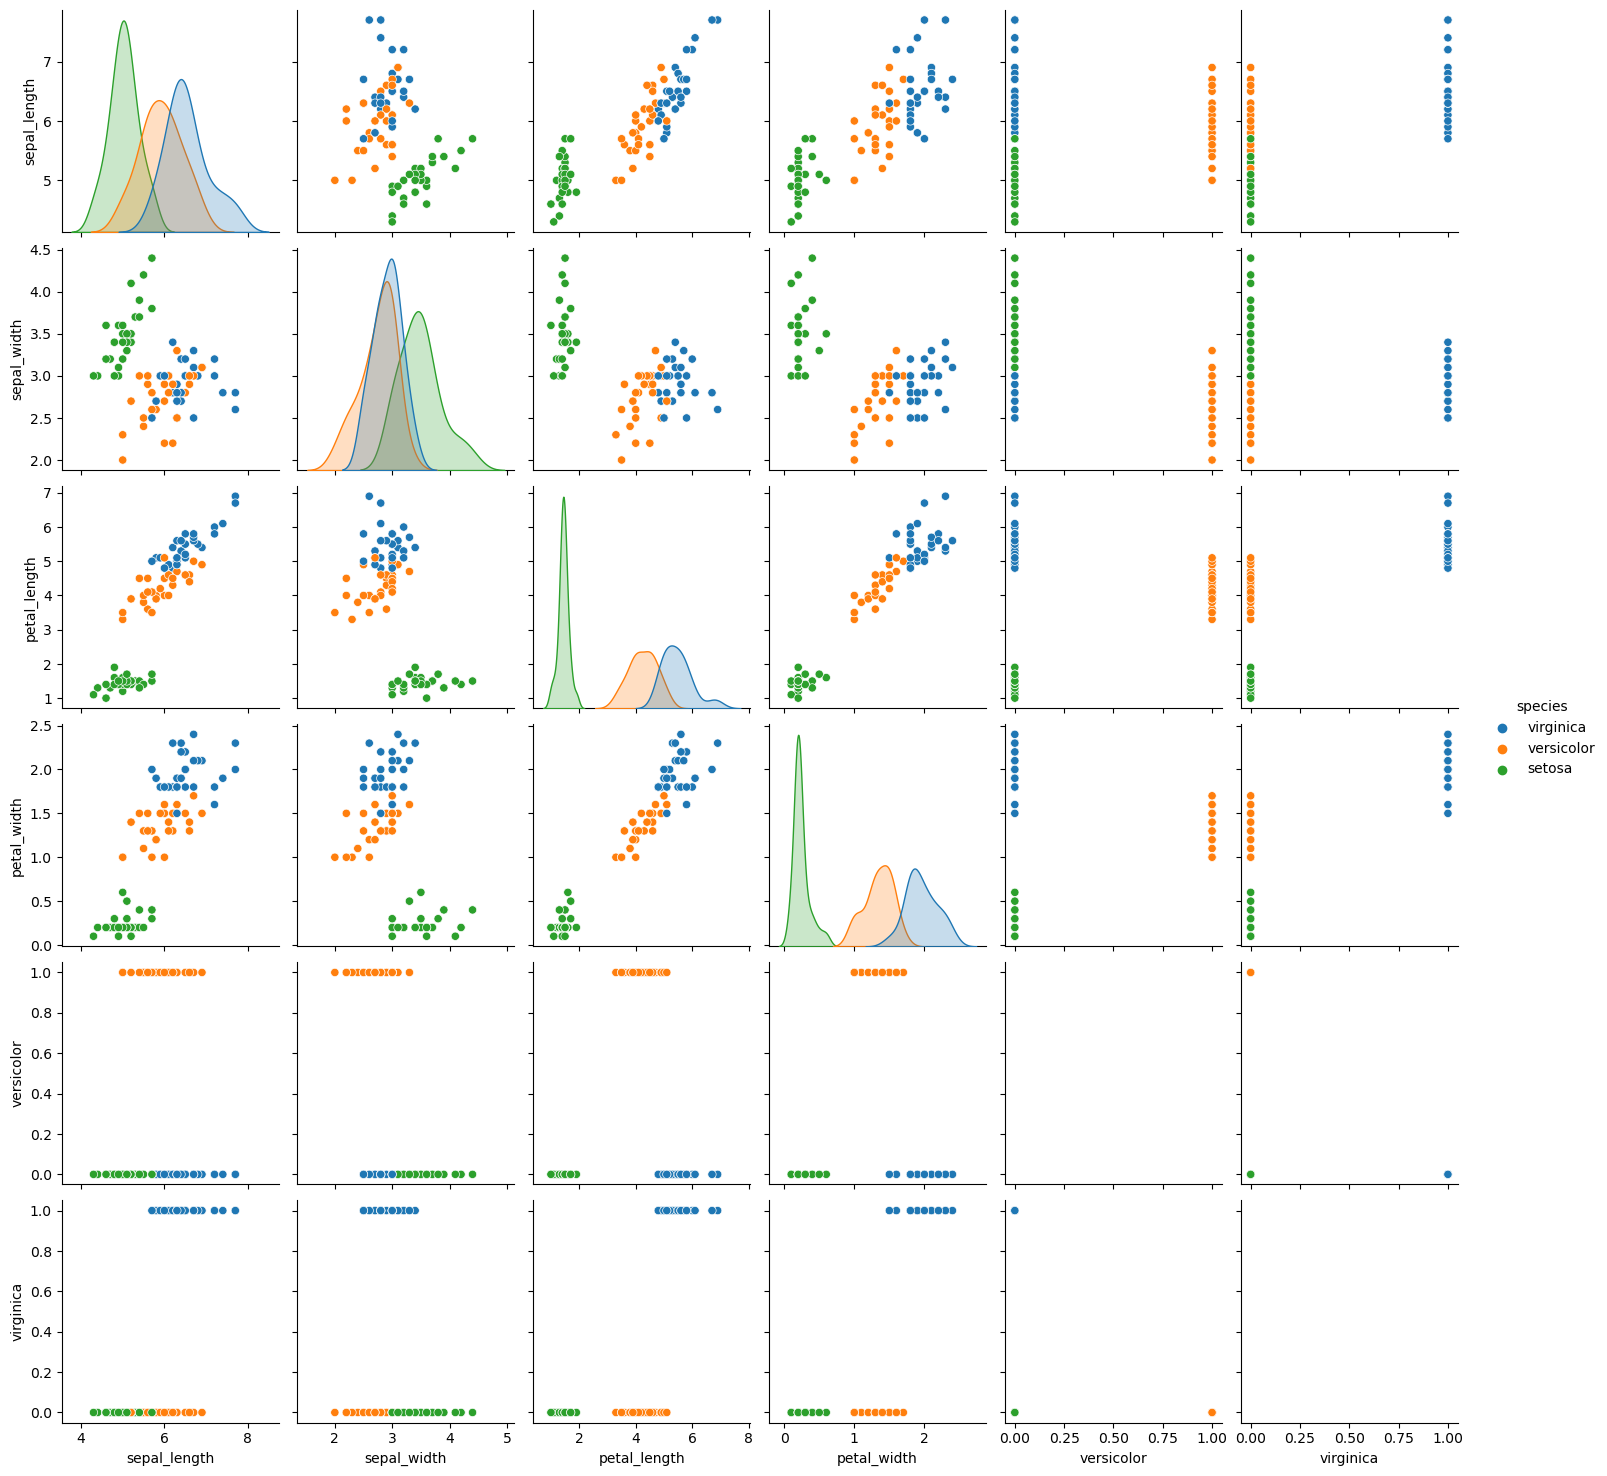

In [142]:
sns.pairplot(train, hue='species')

* Visualize two numeric variables of the species. Hint: sns.relplot with hue or col

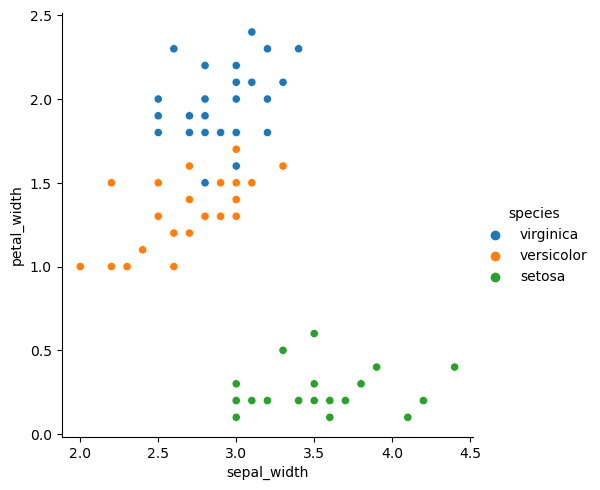

In [143]:
sns.relplot(x=train.sepal_width, y=train.petal_width, hue=train.species)

* Create a swarmplot using a melted dataframe of all your numeric variables. The x-axis should be the variable name, the y-axis the measure. Add another dimension using color to represent species. Document takeaways from this visualization.

<Axes: xlabel='sepal_length', ylabel='petal_length'>

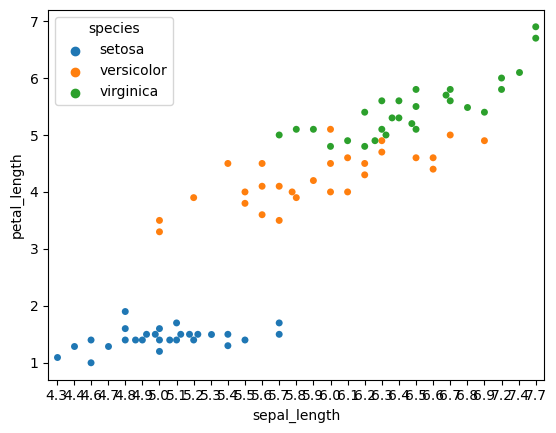

In [144]:
sns.swarmplot(x=train.sepal_length, y=train.petal_length, hue=train.species)

* Ask a specific question of the data, such as: is the sepal area signficantly different in virginica compared to setosa? Answer the question through both a plot and using a mann-whitney or t-test. If you use a t-test, be sure assumptions are met (independence, normality, equal variance).

In [145]:
train['sepal_area'] = train.sepal_length * train.sepal_width
train['petal_area'] = train.petal_length * train.petal_width

In [146]:
train[['sepal_area','petal_area']].head()

,sepal_area,petal_area
139,21.39,11.34
126,17.36,8.64
64,16.24,4.68
15,25.08,0.60
146,15.75,9.50


In [147]:
vir_sa_data = train[train.species == 'versicolor']['sepal_area']
set_sa_data = train[train.species == 'setosa']['sepal_area']

<Axes: xlabel='sepal_area', ylabel='Count'>

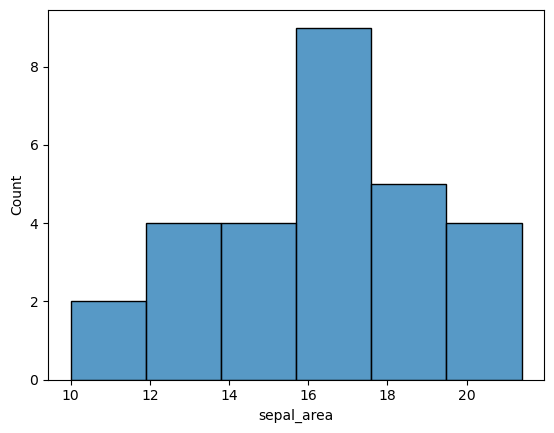

In [148]:
sns.histplot(vir_sa_data)

<Axes: xlabel='sepal_area', ylabel='Count'>

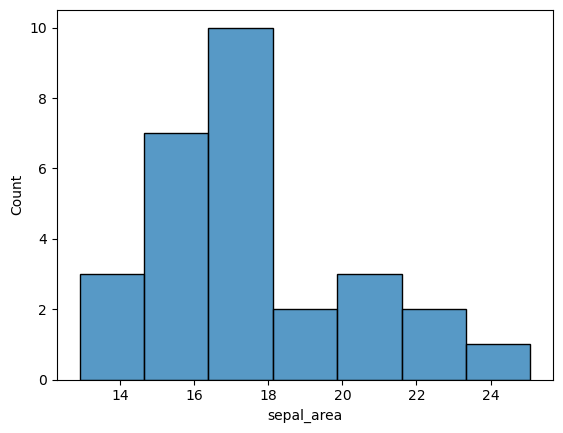

In [149]:
sns.histplot(set_sa_data)

In [150]:
# H0: mean of setosa and versicolor areas are no different
# HA: mean of setosa and versicolor area are significantly different
alpha = .05

In [151]:
# independent = yes
# Norm Distribution? yes
# equal var? False
print(vir_sa_data.var())
print(set_sa_data.var())

7.433212698412696
8.427935846560851


In [152]:
t, p = stats.ttest_ind(vir_sa_data, set_sa_data, equal_var=False)
t, p

(-1.7239277715225338, 0.09046467363785263)

In [153]:
print("is p/2 < alpha? ", p / 2 < alpha)
print("is t > 0? ", t > 0)

is p/2 < alpha?  True
is t > 0?  False


In [154]:
if p / 2 > alpha:
    print("We fail to reject the null hypothesis")
elif t < 0:
    print("We fail to reject the null hypothesis")
else:
    print("We reject the null hypothesis")

We fail to reject the null hypothesis


* Document takeaways and any actions.

In [155]:
# used a 2 samp ttest to see if there was a difference in means for 
#virginica sepal area compared to the setosa sepal area

# the distribution for both sample sets appeared to be similar and normal

# the variance was different

# went with a 95% conf using an alpha of 0.05

# the p- value wasn't < the alpha so we fail to reject the null hypothesis
# so there is no difference in the means of the virginca sample than the setosa area


### Part II

Explore your titanic dataset more completely.

In [156]:
import acquire
titanic_data = acquire.get_titanic_data()

In [157]:
def split_titanic_data(df, target='survived'):
    '''
    split titanic data will split data based on 
    the values present in a cleaned version of titanic
    that is from clean_titanic
    
    '''
    train_val, test = train_test_split(df,
                                   train_size=0.8,
                                   random_state=1108,
                                   stratify=df[target])
    train, validate = train_test_split(train_val,
                                   train_size=0.7,
                                   random_state=1108,
                                   stratify=train_val[target])
    return train, validate, test

In [158]:
def clean_titanic(df):
    '''
    clean titanic will take in a single pandas dataframe
    and will proceed to drop redundant columns
    and nonuseful information
    in addition to addressing null values
    and encoding categorical variables
    '''
    #drop out any redundant, excessively empty, or bad columns
    df = df.drop(columns=['passenger_id','embarked','deck','class'])
    # impute average age and most common embark_town:
    train, validate, test = split_titanic_data(df)
    # impute missing values for our fields using sklearn's simpleimputer
    #create age imputer, with strategry mean
    my_age_imputer = SimpleImputer(strategy='mean')
    # use imputer object to fit to train ages
    my_age_imputer.fit(train[['age']])
    # tranform values in train, validate, and test based on mean fit from the last step
    train.loc[:,'age'] = my_age_imputer.transform(train[['age']])
    validate.loc[:,'age'] = my_age_imputer.transform(validate[['age']])
    test.loc[:,'age'] = my_age_imputer.transform(test[['age']])     
    # go through the same process with embark_town
    my_embark_imputer = SimpleImputer(strategy='most_frequent')
    my_embark_imputer.fit(train[['embark_town']])
    train.loc[:,'embark_town'] = my_embark_imputer.transform(train[['embark_town']])
    validate.loc[:,'embark_town'] = my_embark_imputer.transform(validate[['embark_town']])
    test.loc[:,'embark_town'] = my_embark_imputer.transform(test[['embark_town']])
    # encode categorical values: 
    train = pd.concat(
    [train, pd.get_dummies(train[['sex', 'embark_town']],
                        drop_first=True)], axis=1)
    validate = pd.concat(
    [validate, pd.get_dummies(validate[['sex', 'embark_town']],
                        drop_first=True)], axis=1)
    test = pd.concat(
    [test, pd.get_dummies(test[['sex', 'embark_town']],
                        drop_first=True)], axis=1)                                                  
    return train, validate, test

In [159]:
train, validate, test = clean_titanic(titanic_data)

In [160]:
train.shape, validate.shape, test.shape

((498, 12), (214, 12), (179, 12))

In [161]:
train.head()

,survived,pclass,sex,age,sibsp,parch,fare,embark_town,alone,sex_male,embark_town_Queenstown,embark_town_Southampton
271,1,3,male,25.0,0,0,0.0000,Southampton,1,True,False,True
786,1,3,female,18.0,0,0,7.4958,Southampton,1,False,False,True
86,0,3,male,16.0,1,3,34.3750,Southampton,0,True,False,True
353,0,3,male,25.0,1,0,17.8000,Southampton,0,True,False,True
199,0,2,female,24.0,0,0,13.0000,Southampton,1,False,False,True


* Determine drivers of the target variable

* Determine if certain columns should be dropped

* Determine if it would be valuable to bin some numeric columns

* Determine if it would be valuable to combine multiple columns into one.

Does it make sense to combine any features?

Do you find any surprises?

Document any and all findings and takeaways in your notebook using markdown.

### Part III

Explore your telco data to discover drivers of churn

In [162]:
telco_df = acquire.get_telco_data()

In [163]:
telco_df.head()

,payment_type_id,internet_service_type_id,contract_type_id,customer_id,gender,senior_citizen,partner,dependents,tenure,phone_service,...,tech_support,streaming_tv,streaming_movies,paperless_billing,monthly_charges,total_charges,churn,contract_type,internet_service_type,payment_type
0,2,1,2,0002-ORFBO,Female,0,Yes,Yes,9,Yes,...,Yes,Yes,No,Yes,65.6,593.3,No,One year,DSL,Mailed check
1,2,1,1,0003-MKNFE,Male,0,No,No,9,Yes,...,No,No,Yes,No,59.9,542.4,No,Month-to-month,DSL,Mailed check
2,1,2,1,0004-TLHLJ,Male,0,No,No,4,Yes,...,No,No,No,Yes,73.9,280.85,Yes,Month-to-month,Fiber optic,Electronic check
3,1,2,1,0011-IGKFF,Male,1,Yes,No,13,Yes,...,No,Yes,Yes,Yes,98.0,1237.85,Yes,Month-to-month,Fiber optic,Electronic check
4,2,2,1,0013-EXCHZ,Female,1,Yes,No,3,Yes,...,Yes,Yes,No,Yes,83.9,267.4,Yes,Month-to-month,Fiber optic,Mailed check


In [164]:
def prep2_telco(telco_df):
    #drop duplicate columns
    telco_df = telco_df.drop(columns =['payment_type_id','internet_service_type_id','contract_type_id'])
    #create dummies
    dummy_list = ['gender','partner', 'dependents', 'phone_service', 'multiple_lines', 'online_security', 'online_backup', 'device_protection', 'tech_support', 'streaming_tv', 'streaming_movies', 'paperless_billing', 'churn', 'contract_type', 'internet_service_type', 'payment_type']
    dummy_df = pd.get_dummies(telco_df[dummy_list], drop_first=True)
    # join dummy & telco_df
    telco_df = pd.concat([telco_df, dummy_df], axis=1)
    # drop str column categories
    cols_to_drop = ['gender','partner', 'dependents', 'phone_service', 'multiple_lines', 'online_security', 'online_backup', 'device_protection', 'tech_support', 'streaming_tv', 'streaming_movies', 'paperless_billing', 'churn', 'contract_type', 'internet_service_type', 'payment_type']
    telco_df = telco_df.drop(columns= cols_to_drop)
    #total_charges.str.replace(' ', '0').astype(float)
    telco_df.total_charges = telco_df.total_charges.str.replace(' ', '0').astype(float)

    return telco_df

In [165]:
telco = prep2_telco(telco_df)

In [166]:
telco.head()

,customer_id,senior_citizen,tenure,monthly_charges,total_charges,gender_Male,partner_Yes,dependents_Yes,phone_service_Yes,multiple_lines_No phone service,...,streaming_movies_No internet service,streaming_movies_Yes,paperless_billing_Yes,churn_Yes,contract_type_One year,contract_type_Two year,internet_service_type_Fiber optic,payment_type_Credit card (automatic),payment_type_Electronic check,payment_type_Mailed check
0,0002-ORFBO,0,9,65.6,593.30,False,True,True,True,False,...,False,False,True,False,True,False,False,False,False,True
1,0003-MKNFE,0,9,59.9,542.40,True,False,False,True,False,...,False,True,False,False,False,False,False,False,False,True
2,0004-TLHLJ,0,4,73.9,280.85,True,False,False,True,False,...,False,False,True,True,False,False,True,False,True,False
3,0011-IGKFF,1,13,98.0,1237.85,True,True,False,True,False,...,False,True,True,True,False,False,True,False,True,False
4,0013-EXCHZ,1,3,83.9,267.40,False,True,False,True,False,...,False,False,True,True,False,False,True,False,False,True


In [167]:
train, validate, test = prepare.split_data(telco, 'churn_Yes')

Train: 0.5598466562544371
Validate: 0.24009654976572484
Test: 0.20005679397983814


In [168]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 3943 entries, 4630 to 741
Data columns (total 31 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   customer_id                            3943 non-null   object 
 1   senior_citizen                         3943 non-null   int64  
 2   tenure                                 3943 non-null   int64  
 3   monthly_charges                        3943 non-null   float64
 4   total_charges                          3943 non-null   float64
 5   gender_Male                            3943 non-null   bool   
 6   partner_Yes                            3943 non-null   bool   
 7   dependents_Yes                         3943 non-null   bool   
 8   phone_service_Yes                      3943 non-null   bool   
 9   multiple_lines_No phone service        3943 non-null   bool   
 10  multiple_lines_Yes                     3943 non-null   bool   
 11  online_

In [169]:
# I want to split the churns between yes and no's and the cat / nums

# separating our numeric and categorical columns:
# initialize two empty lists for each type:
cat_cols, num_cols = [], []
# set up a for loop to build those lists out:
# so for every column in explore_columns:
for col in train:
    # check to see if its an object type,
    # if so toss it in categorical
    if train[col].dtype == 'O':
        cat_cols.append(col)
    # otherwise if its numeric:
    else:
        # check to see if we have more than just a few values:
        # if thats the case, toss it in categorical
        if train[col].nunique() < 10:
            cat_cols.append(col)
        # and otherwise call it continuous by elimination
        else:
            num_cols.append(col)

In [170]:
cat_cols

['customer_id',
 'senior_citizen',
 'gender_Male',
 'partner_Yes',
 'dependents_Yes',
 'phone_service_Yes',
 'multiple_lines_No phone service',
 'multiple_lines_Yes',
 'online_security_No internet service',
 'online_security_Yes',
 'online_backup_No internet service',
 'online_backup_Yes',
 'device_protection_No internet service',
 'device_protection_Yes',
 'tech_support_No internet service',
 'tech_support_Yes',
 'streaming_tv_No internet service',
 'streaming_tv_Yes',
 'streaming_movies_No internet service',
 'streaming_movies_Yes',
 'paperless_billing_Yes',
 'churn_Yes',
 'contract_type_One year',
 'contract_type_Two year',
 'internet_service_type_Fiber optic',
 'payment_type_Credit card (automatic)',
 'payment_type_Electronic check',
 'payment_type_Mailed check']

In [171]:
num_cols

['tenure', 'monthly_charges', 'total_charges']

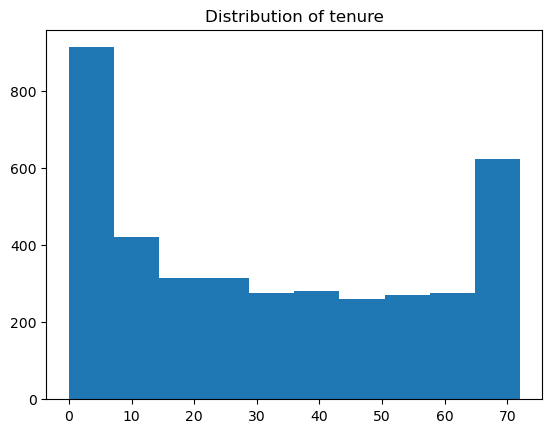

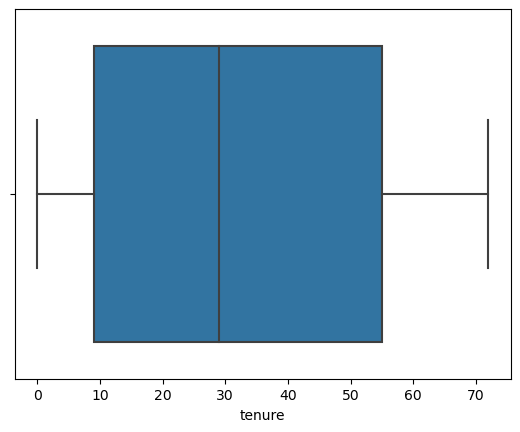

~~~~~~~~~~~~


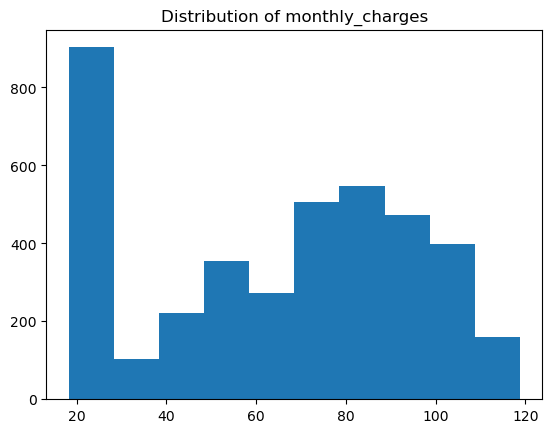

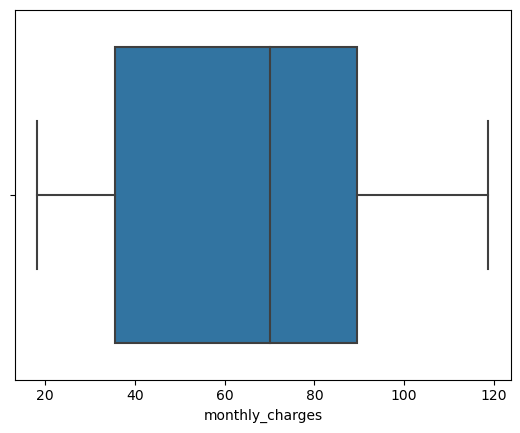

~~~~~~~~~~~~


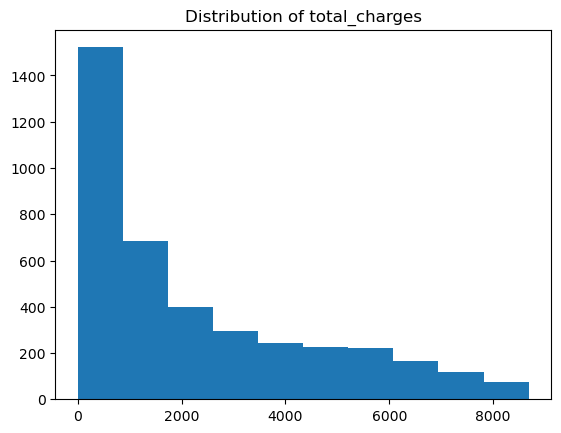

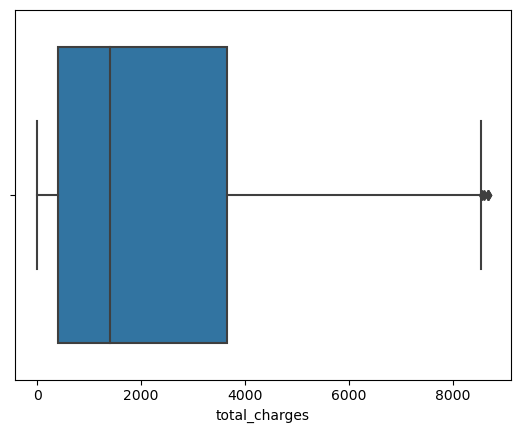

~~~~~~~~~~~~


In [172]:
for col in num_cols:
    plt.hist(train[col])
    plt.title(f'Distribution of {col}')
    plt.show()
    sns.boxplot(data=train, x=col)
    plt.show()
    print('~~~~~~~~~~~~')

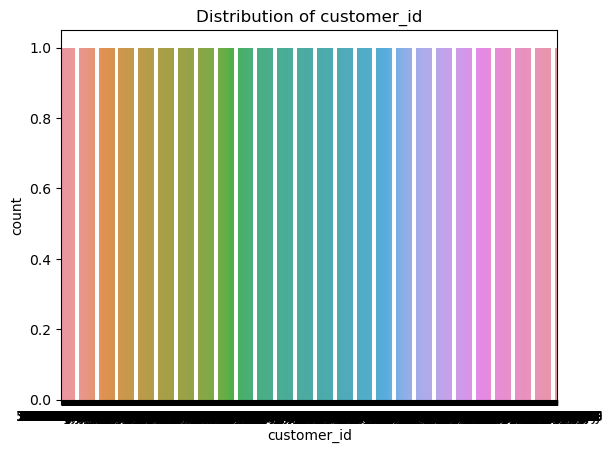

~~~~~~~~~~~~


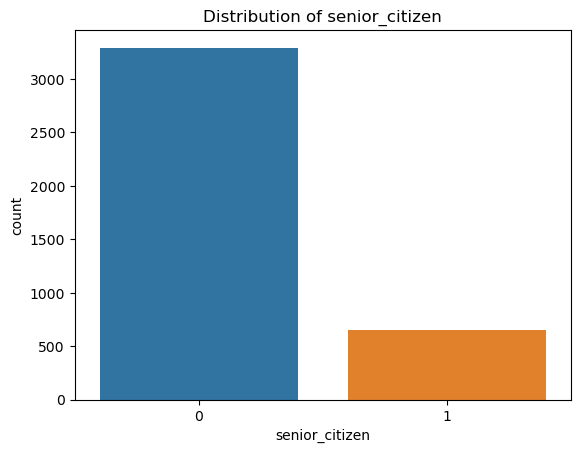

~~~~~~~~~~~~


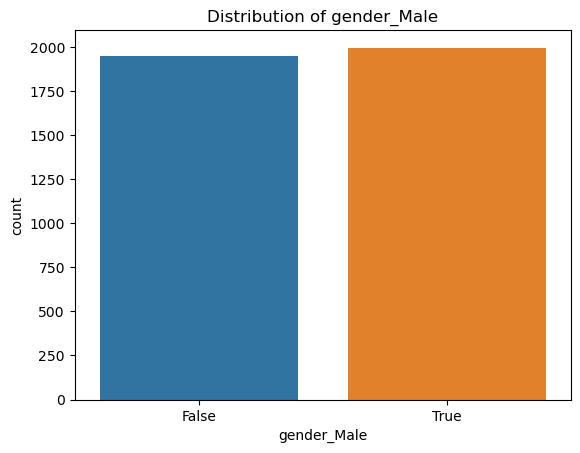

~~~~~~~~~~~~


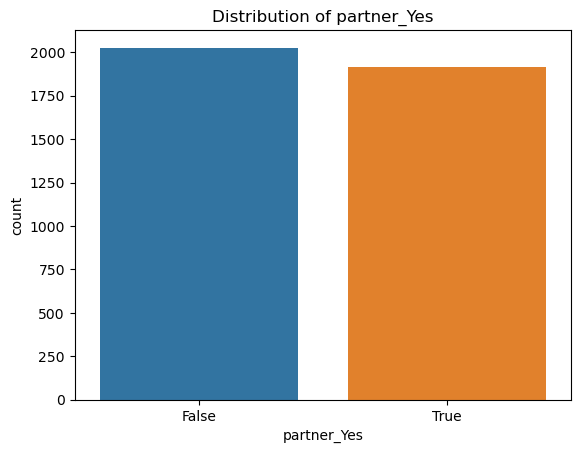

~~~~~~~~~~~~


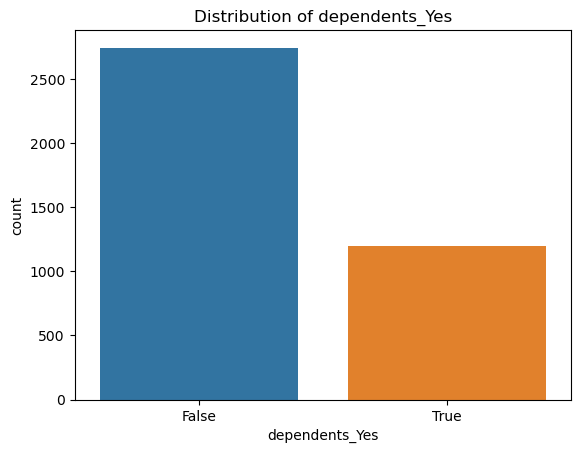

~~~~~~~~~~~~


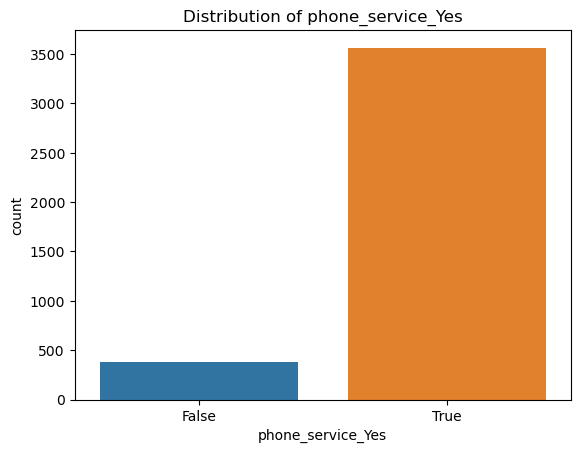

~~~~~~~~~~~~


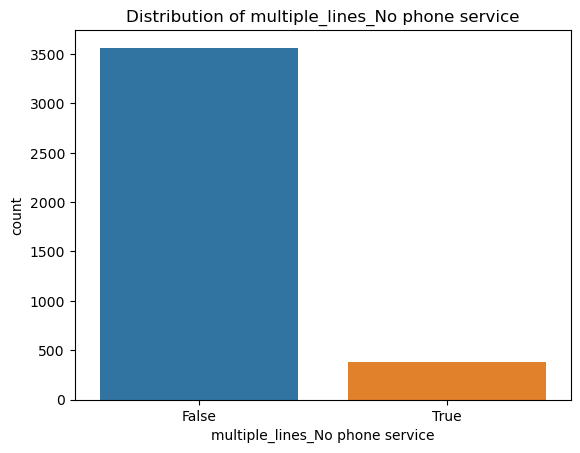

~~~~~~~~~~~~


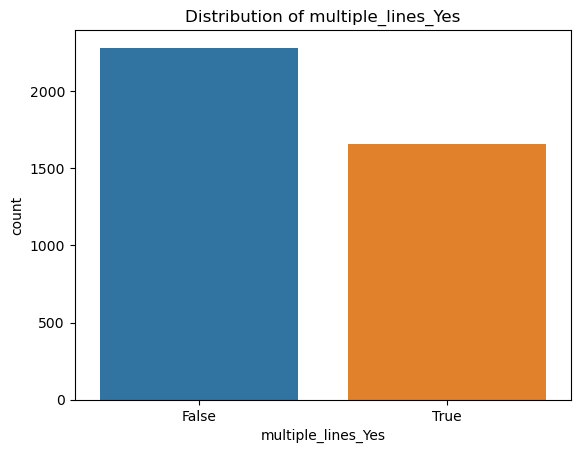

~~~~~~~~~~~~


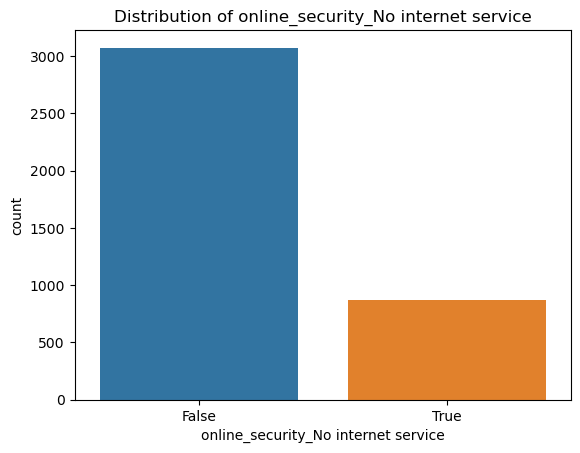

~~~~~~~~~~~~


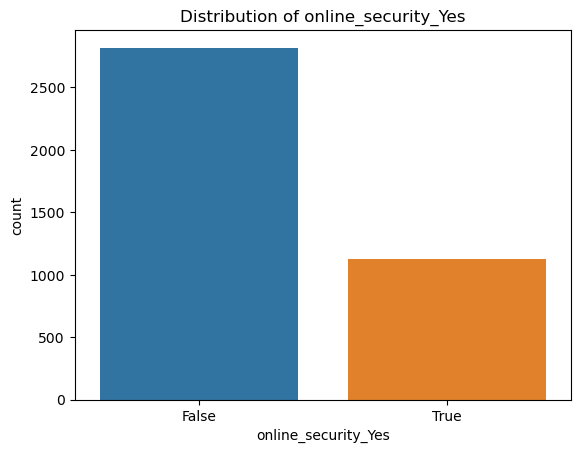

~~~~~~~~~~~~


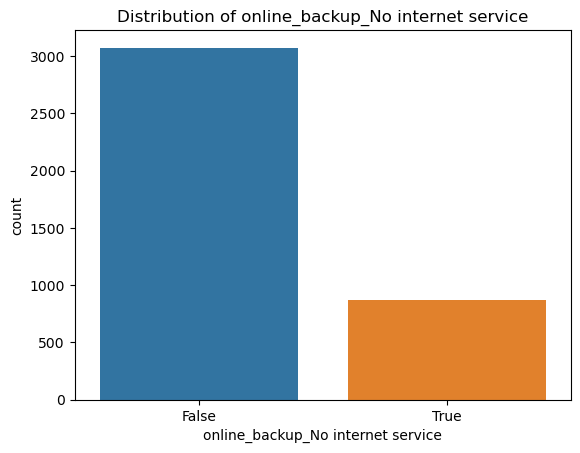

~~~~~~~~~~~~


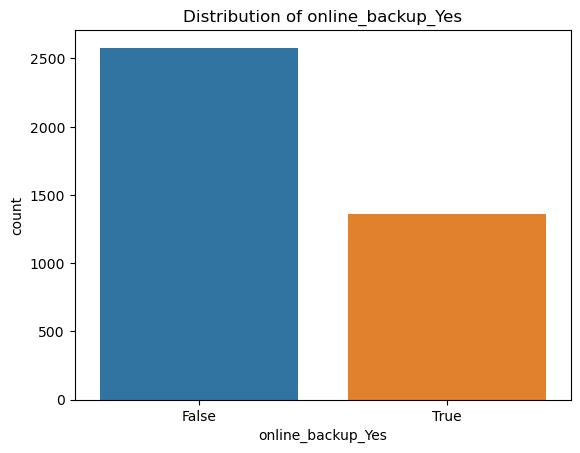

~~~~~~~~~~~~


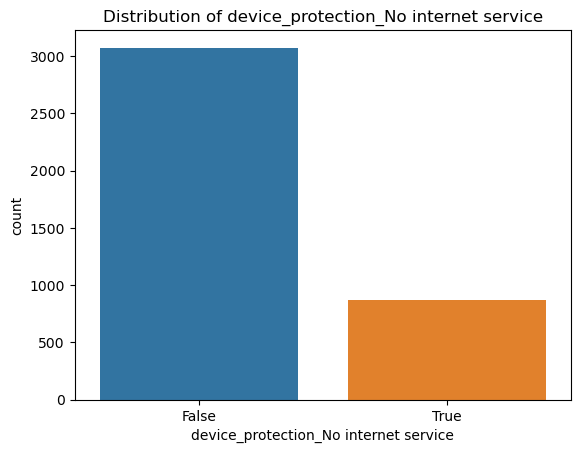

~~~~~~~~~~~~


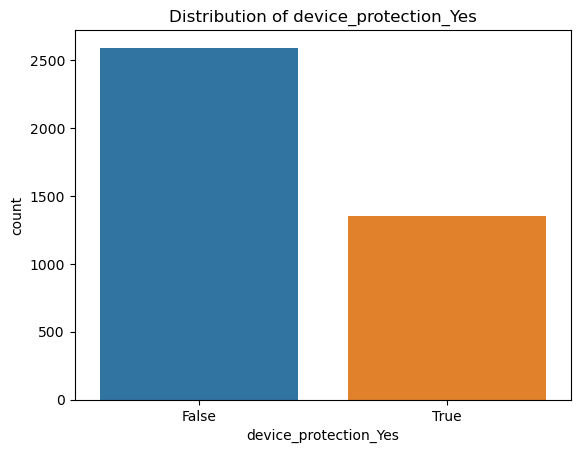

~~~~~~~~~~~~


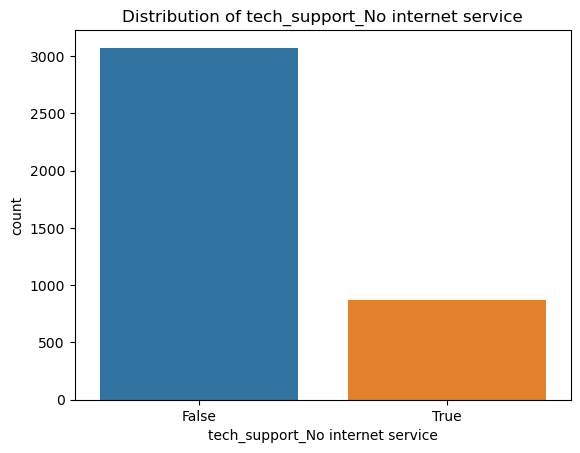

~~~~~~~~~~~~


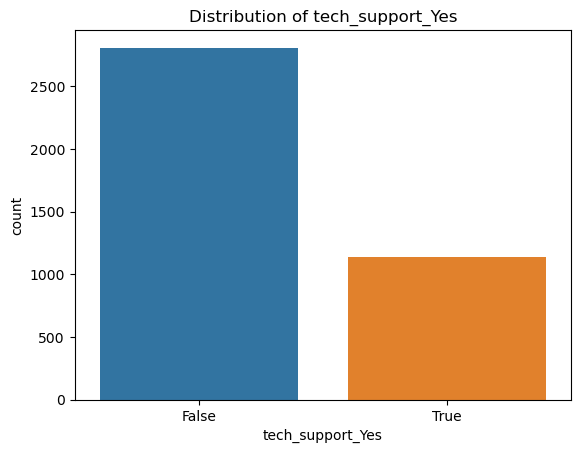

~~~~~~~~~~~~


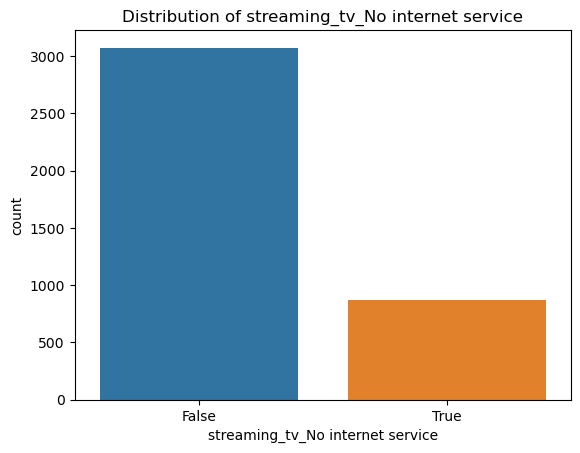

~~~~~~~~~~~~


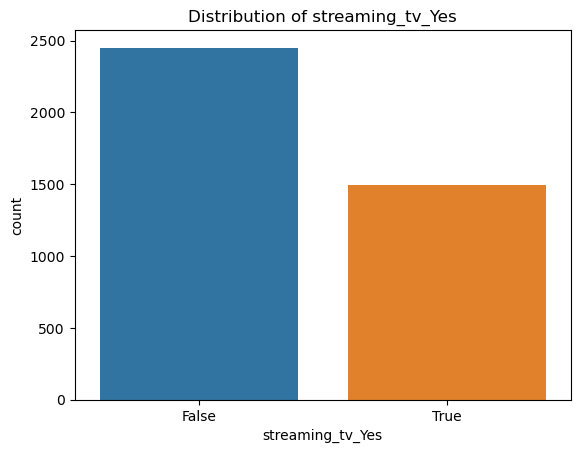

~~~~~~~~~~~~


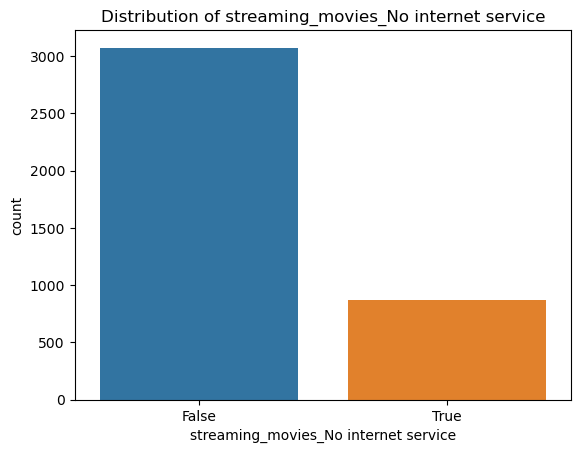

~~~~~~~~~~~~


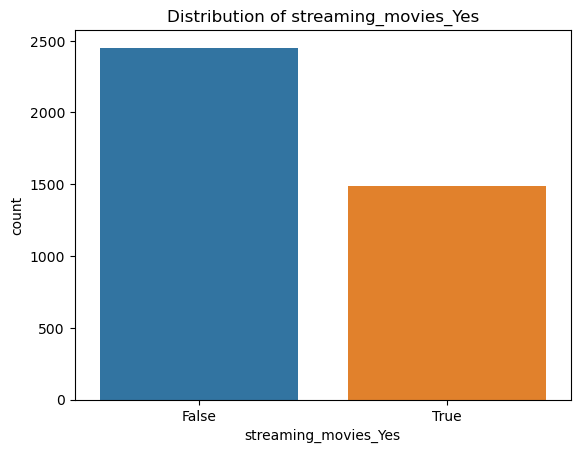

~~~~~~~~~~~~


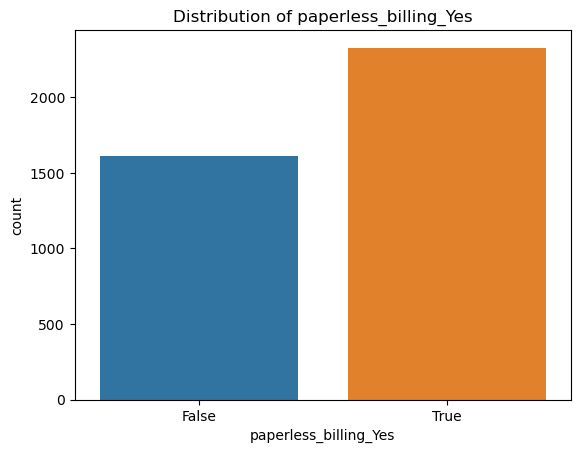

~~~~~~~~~~~~


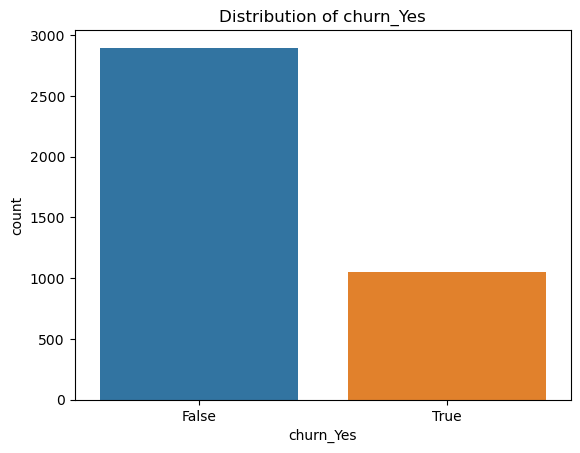

~~~~~~~~~~~~


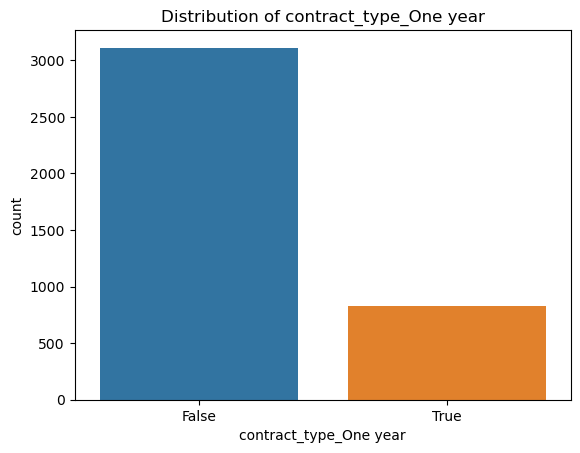

~~~~~~~~~~~~


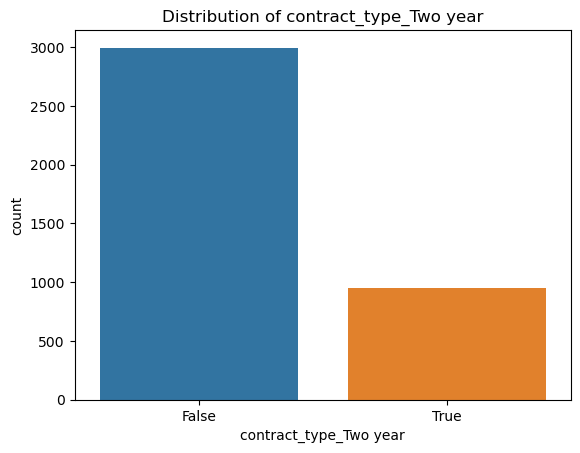

~~~~~~~~~~~~


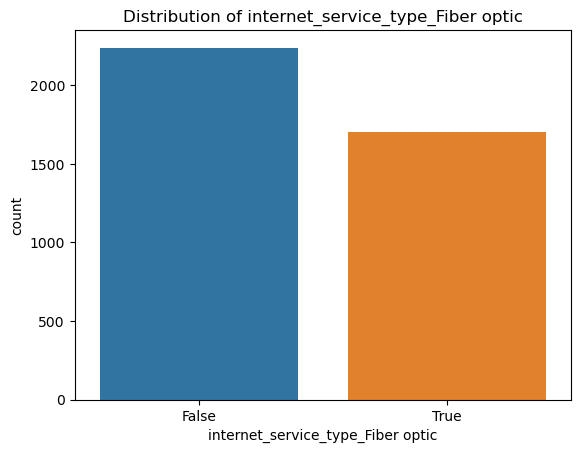

~~~~~~~~~~~~


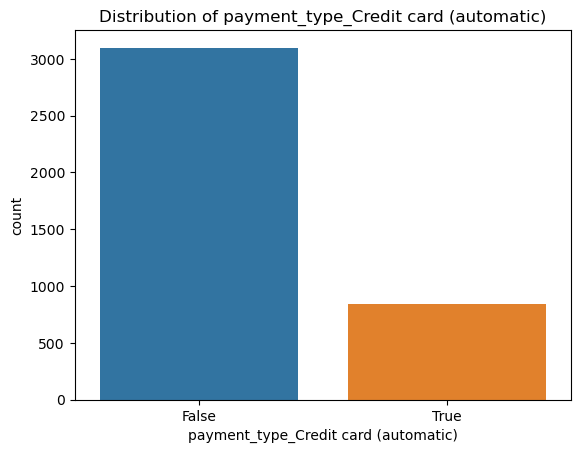

~~~~~~~~~~~~


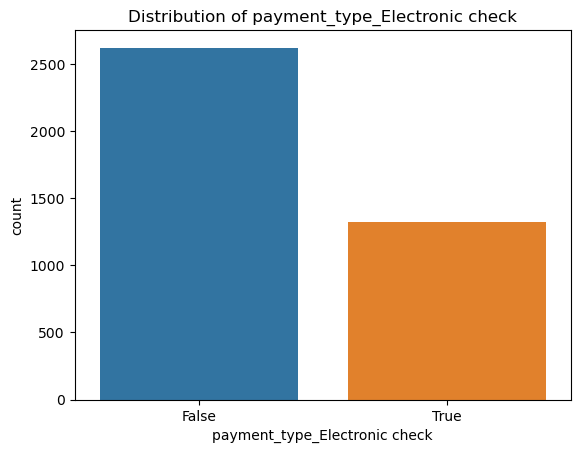

~~~~~~~~~~~~


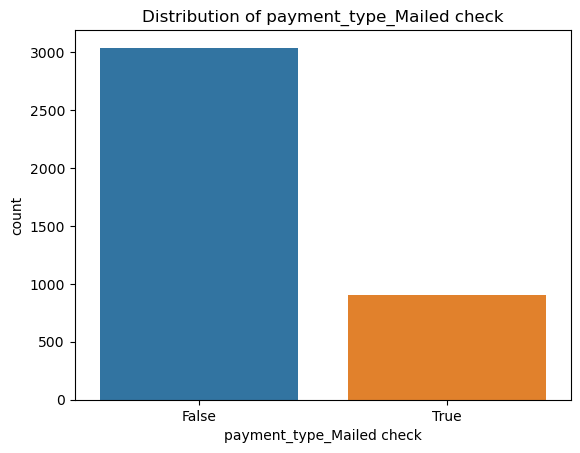

~~~~~~~~~~~~


In [173]:
for col in cat_cols:
    sns.countplot(data=train, x=col)
    plt.title(f'Distribution of {col}')
    plt.show()
    
    print('~~~~~~~~~~~~')

In [174]:
# H0: Having dependents does not affect churning
# Ha: Customers are less likely to churn if they have dependents

In [175]:
pd.crosstab(train.dependents_Yes, train.churn_Yes, margins=True)

churn_Yes,False,True,All
dependents_Yes,,,
False,1883,860,2743
True,1014,186,1200
All,2897,1046,3943


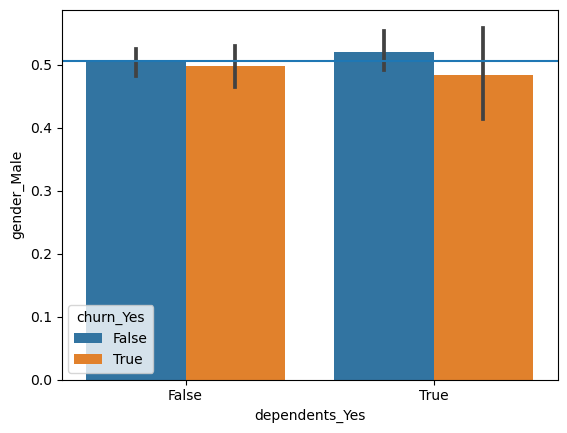

In [176]:
sns.barplot(x=train.dependents_Yes, y=train.gender_Male, hue=train.churn_Yes)
plt. axhline(y=train.gender_Male.mean())

* Determine if certain columns should be dropped

* Determine if it would be valuable to bin some numeric columns

* Determine if it would be valuable to combine multiple columns into one.

* What are your drivers of churn?

Does it make sense to combine any features?

Do you find any surprises?

In [177]:
# not sure if having dependents has an affect on churn

Document any and all findings and takeaways in your notebook using markdown.